In [480]:
import pandas as pd

car = pd.read_csv('car-sales.csv')
car.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [481]:
car = car.drop_duplicates()

In [482]:
car['Make'] = car.Make.astype('category')
car['Colour'] = car.Colour.astype('category')
car


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [483]:
car.isnull().sum()

Make             49
Colour           50
Odometer (KM)    49
Doors            50
Price            49
dtype: int64

In [484]:
car['Doors'] = car['Doors'].fillna(value=int(car['Doors'].mean()))

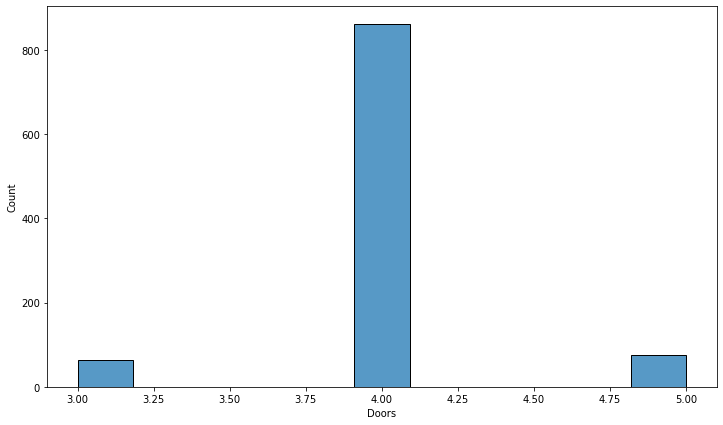

In [485]:
plt.figure(figsize=(12,7))
sns.histplot(car['Doors'])
plt.show()

# There's something wrong with the column

In [486]:
# Filling the numerical columns by mean/mode
# Fill doors by median/ mean no huge deviation
# Odometer has outliers to be filled by median

a = car['Odometer (KM)'].mean()
b = car['Odometer (KM)'].std()
c = car['Odometer (KM)'].mode()
d = car['Odometer (KM)'].median()

car['Odometer (KM)'] = car['Odometer (KM)'].fillna(value=car['Odometer (KM)'].mean())

print(f'{a}\t\t{b}\t\t{c}\t\t{d}')


131253.23789473684		69094.85718673005		0     73869.0
1    129188.0
dtype: float64		131821.0


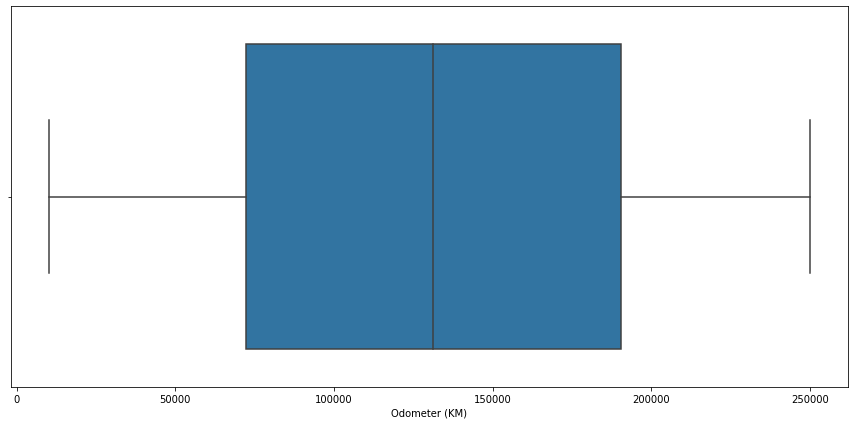

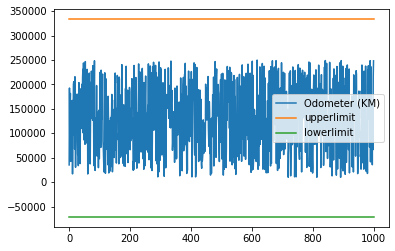

In [487]:
# Detecting outliers
# Lacks outliers

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

sns.boxplot(x='Odometer (KM)', data=car)
odometer = pd.DataFrame()


odometer['Odometer (KM)'] = car['Odometer (KM)']
odometer['upperlimit'] = car['Odometer (KM)'].mean() + (car['Odometer (KM)'].std() *3)
odometer['lowerlimit'] = car['Odometer (KM)'].mean()- (car['Odometer (KM)'].std()*3)


odometer.plot()
plt.show()

In [488]:
e = car['Price'].mean()
f = car['Price'].std()
g = car['Price'].mode()
h = car['Price'].median()

# mean_value = g.mean()
print(e)
car['Price'] = car['Price'].fillna(value=car['Price'].mean())
print(car['Price'].mean())
# print(f'{e}\t\t{f}\t\t{g}\t\t{h}')
car['Price']
car.isnull().sum()

16042.814736842105
16042.814736842107


Make             49
Colour           50
Odometer (KM)     0
Doors             0
Price             0
dtype: int64

In [489]:
# Evaluating the categorical data


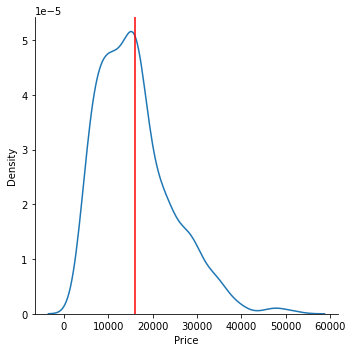

In [490]:

sns.displot(car['Price'], kind='kde')
plt.axvline(x=car['Price'].mean(),
            color='red')

# sns.boxplot(x='Price', data=car)
plt.show()

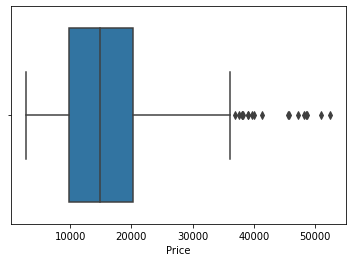

(999, 5)


In [491]:

sns.boxplot(x='Price', data=car)
plt.show()
print(car.shape)

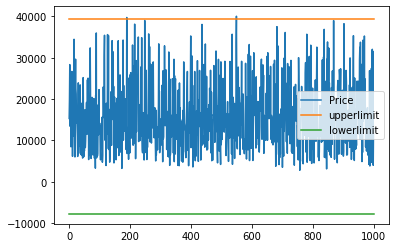

In [492]:
price = pd.DataFrame()
car.drop(car.loc[car['Price'] >= 41193.22334].index, inplace = True)
price['Price'] = car['Price']
price['upperlimit'] = car['Price'].mean() + (car['Price'].std() *3)
price['lowerlimit'] = car['Price'].mean()- (car['Price'].std()*3)

price.plot()
plt.legend()

# Concluding price lacks lower limit outliers but has upperlimit ones

# car['Price'] = car['Price'].drop(car[car['Price']>=41193.22334])

In [493]:
#  Focusing on the categorical data
# car = car.apply(lambda x: x.fillna(x.value_counts().index[0]))
# cars = car.fillna(car['Make'].value_counts().index[0]) 
car = car.apply(lambda x:x.fillna(x.value_counts().index[0]))
car.shape

(990, 5)

In [494]:
car.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [495]:
car.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [496]:
car.info()
# sns.violinplot(x='Make', data= car)
# plt.show()

# sns.violinplot(x='Colour', data= car)
# plt.show()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Make           990 non-null    category
 1   Colour         990 non-null    category
 2   Odometer (KM)  990 non-null    float64 
 3   Doors          990 non-null    float64 
 4   Price          990 non-null    float64 
dtypes: category(2), float64(3)
memory usage: 33.3 KB


In [497]:
car['Make'].value_counts()

Toyota    427
Honda     292
Nissan    183
BMW        88
Name: Make, dtype: int64

In [498]:
car['Colour'].value_counts()

White    432
Blue     300
Black     95
Red       88
Green     75
Name: Colour, dtype: int64

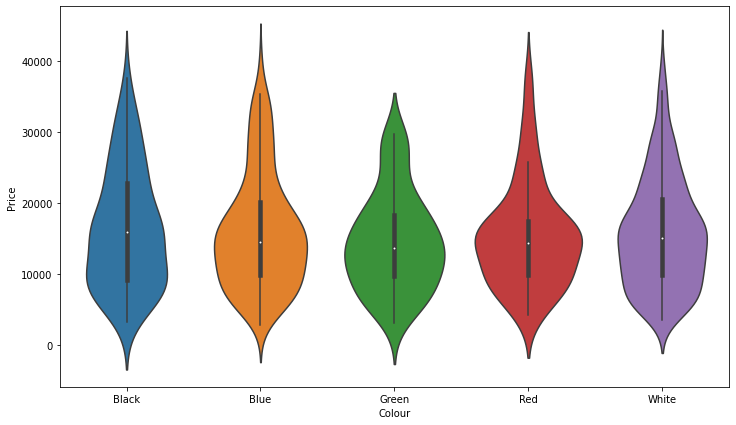

In [499]:
plt.figure(figsize=(12,7))
sns.violinplot(x='Colour',y ='Price', data=car)
plt.show()

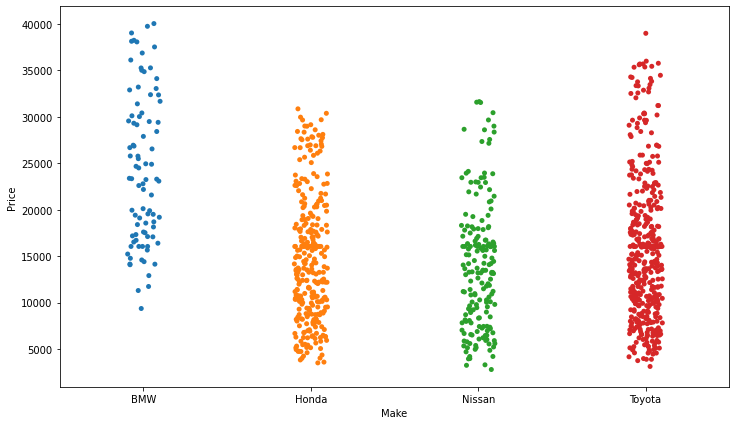

In [500]:
plt.figure(figsize=(12,7))
sns.stripplot(x='Make',y ='Price', data=car)
plt.show()

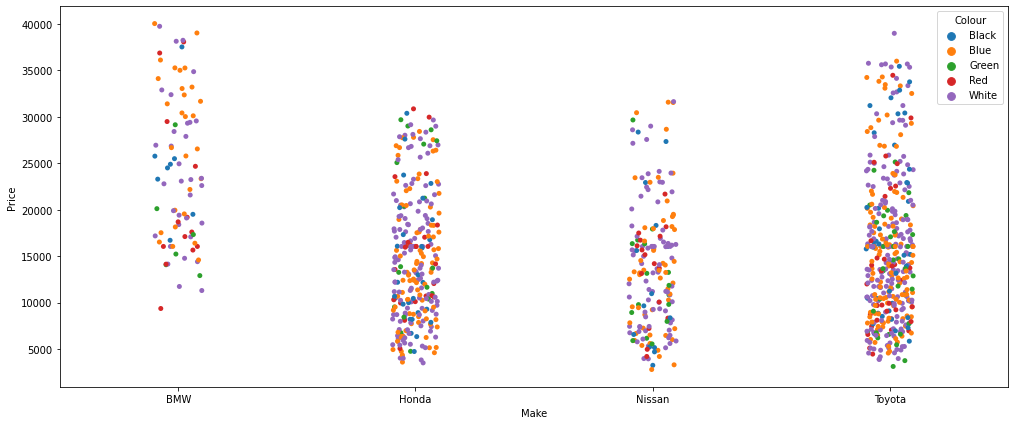

In [501]:
plt.figure(figsize=(17,7))
sns.stripplot(x='Make',y ='Price', hue='Colour', data=car)
plt.show()

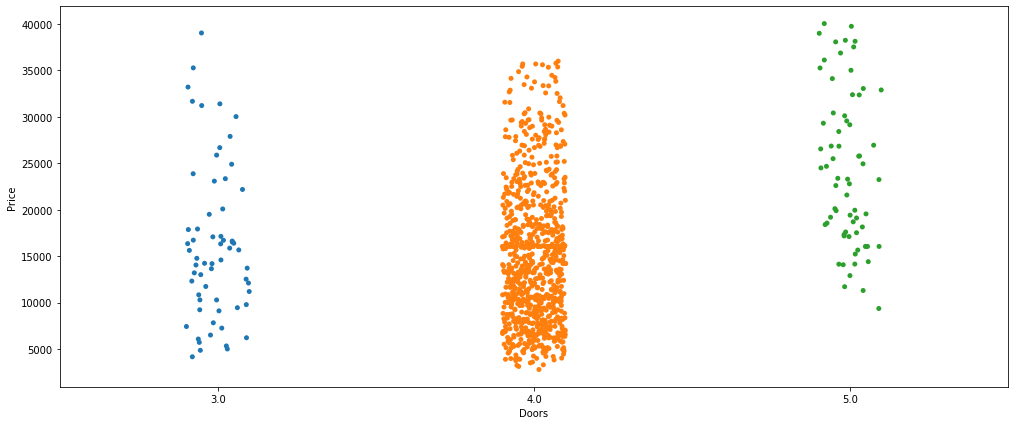

In [502]:
plt.figure(figsize=(17,7))
sns.stripplot(x='Doors',y ='Price', data=car)
plt.show()

In [503]:
# car = car.groupby(['Make'])

In [504]:
car = car.drop('Doors', axis='columns')
car

,Make,Colour,Odometer (KM),Price
0,Honda,White,35431.0,15323.0
1,BMW,Blue,192714.0,19943.0
2,Honda,White,84714.0,28343.0
3,Toyota,White,154365.0,13434.0
4,Nissan,Blue,181577.0,14043.0
...,...,...,...,...
995,Toyota,Black,35820.0,32042.0
996,Toyota,White,155144.0,5716.0
997,Nissan,Blue,66604.0,31570.0
998,Honda,White,215883.0,4001.0


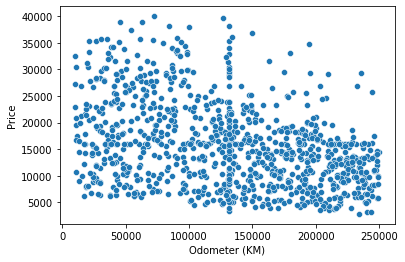

In [505]:
sns.scatterplot(x='Odometer (KM)', y='Price', data=car)
plt.show()

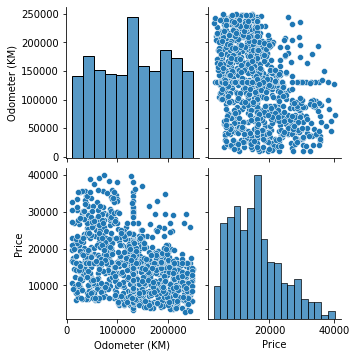

In [506]:
sns.pairplot(car)

In [507]:
df = car.groupby(['Make','Colour'])['Odometer (KM)', 'Price'].mean()
df

C:\Users\user\AppData\Local\Temp/ipykernel_17328/1765534594.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = car.groupby(['Make','Colour'])['Odometer (KM)', 'Price'].mean()


Odometer (KM)         Price
Make   Colour                             
BMW    Black   147689.625000  24706.000000
       Blue    124926.311203  27506.207669
       Green   130104.166667  18128.666667
       Red     118329.787530  20991.586883
       White   145622.953812  23883.661053
Honda  Black   140506.241379  14204.125154
       Blue    134628.297481  14280.460674
       Green   123732.013216  17320.444444
       Red     119797.750000  15486.385789
       White   117375.012249  14530.250558
Nissan Black   152357.642857  13030.415338
       Blue    134223.161365  14032.925926
       Green   148961.250000  12509.562500
       Red     143255.173622  13527.224396
       White   131404.426239  14015.986444
Toyota Black   118618.369043  17255.441914
       Blue    139926.356214  15566.374672
       Green   143837.706105  13393.155549
       Red     140985.977585  13940.235294
       White   129772.060222  15928.097092

In [514]:
df1 = car.groupby(['Odometer (KM)', 'Price'])['Make','Colour']
df1.first()

C:\Users\user\AppData\Local\Temp/ipykernel_17328/2701784536.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = car.groupby(['Odometer (KM)', 'Price'])['Make','Colour']


,,Make,Colour
Odometer (KM),Price,,
10148.0,27337.0,Nissan,Black
10217.0,22883.0,Toyota,White
10247.0,32566.0,Toyota,White
10953.0,16636.0,Honda,White
10954.0,30439.0,Nissan,Blue
...,...,...,...
248634.0,9919.0,Toyota,Red
248736.0,8358.0,Nissan,Black
248815.0,9785.0,Toyota,White


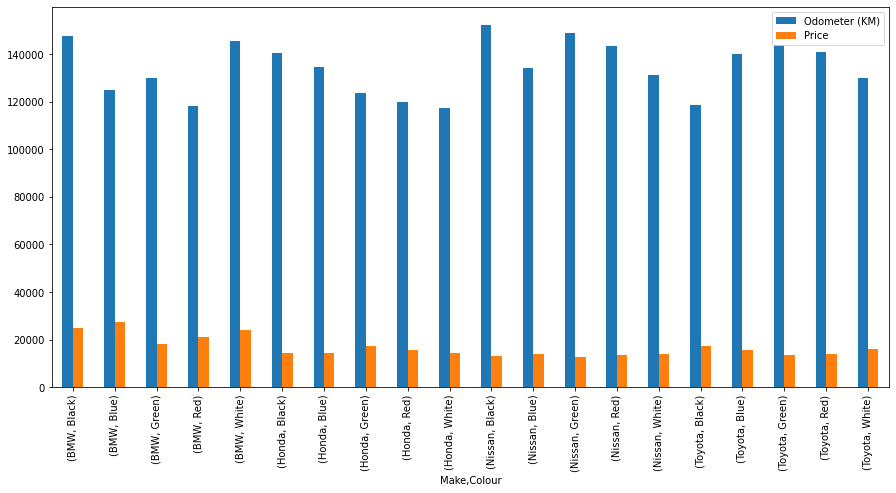

In [509]:
df.plot.bar(figsize=(15,7))
# df.plot.bar()
plt.ticklabel_format(style='plain', axis = 'y')
plt.show()